# CA 3, Interactive Learning, Fall 2024
- **Name**: Majid Faridfar
- **Student ID**: 810199569

## Problem 1

Suppose an agent solves an MDP problem in interaction with a human using Q-Learning. Given the human-in-the-loop nature of the problem, the rewards are sparse. How does this affect the convergence rate? What methods do you suggest to solve the problems caused by sparse rewards? What are other human-in-the-loop problems? How can they be solved?

### Effects of Sparse Rewards on Convergence Rate

1. **Delayed Learning**: Sparse rewards mean that the agent receives feedback infrequently, making it difficult to associate actions with outcomes. As a result, the agent often updates its Q-values only after many interactions, slowing down the learning process.

2. **Exploration-Exploitation Trade-off**: With sparse rewards, there can be less incentive for the agent to explore the environment. If the rewards are not encountered frequently, it may prematurely focus on certain actions, potentially missing more rewarding actions elsewhere in the state space.

3. **High Variance**: Sparse rewards can lead to high variance in the updates of the Q-values since updates will be driven by a small set of experiences. This can make it harder for the learning algorithm to converge on optimal policies.

### Methods to Address Sparse Rewards

1. **Reward Shaping**: Adding intermediate rewards that guide the agent towards the desired goal can help. These can be based on heuristics or other domain knowledge. However, care should be taken to ensure the shaped rewards don’t lead the agent to learn a suboptimal policy.

2. **Curriculum Learning**: Start with easier tasks and progressively move to more difficult ones. This allows the agent to receive more frequent rewards initially, which can lead to a better understanding of the environment before tackling the full problem.

3. **Intrinsic Motivation**: Introduce intrinsic rewards that encourage exploration or novelty. For example, rewards can be provided for discovering new states or for achieving certain skills or sub-goals. This can help the agent learn useful representations even in sparse-reward environments.

4. **Use of Model-based Methods**: Instead of relying purely on Q-Learning, integrating a model of the environment can facilitate planning. The agent can simulate potential outcomes, which may allow it to learn more effectively.

5. **Efficiency in Exploration**: Techniques such as epsilon-greedy strategies or more advanced methods like Upper Confidence Bound (UCB) or Thompson Sampling can encourage more exploratory behavior in uncertain areas, helping discover rewarding experiences.

6. **Replay Memory**: Utilizing experience replay can help the agent learn from past experiences more efficiently. By randomly sampling transitions from previous episodes, the agent can break the correlation in data and stabilize learning.

### Other Human-in-the-Loop Problems

1. **Collaborative Filtering**: In recommendation systems, user feedback (ratings, clicks) can be sparse. Techniques like matrix factorization and latent factor models can help reconstruct preferences based on limited input.

2. **Active Learning**: Here, a model queries a human to label uncertain data points. Various strategies exist (e.g., uncertainty sampling, query-by-committee) to choose the most informative samples to label.

3. **Interactive Machine Learning**: In this setting, a model receives input from a user iteratively. Approaches like online learning and user feedback incorporation (contextual bandits) can be utilized to adapt the model effectively based on human input.

4. **Game Design and Testing**: In video gaming, human players provide feedback that is often sparse (e.g., bugs, balance issues). Mid-level metrics (user engagement) can be used to steer development, while human playtesting can be structured to get meaningful feedback.

## Problem 2

Compare the two algorithms SARSA and SARSA-Expected in terms of the method of updating the Q value. Which algorithm performs better in terms of stability and convergence speed? In what situations is it better to use each algorithm?

### Comparison of SARSA and SARSA-Expected

#### Q-value Updating Method

##### SARSA

The update rule for SARSA is based on the actual action taken by the agent. Specifically, it updates the Q-value for the current state-action pair $(s, a)$ as follows:
$$
    Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + Q(s', a') - Q(s, a) \right)
$$
where $s'$ is the next state, $a'$ is the next action taken from state $s'$, $r$ is the immediate reward, and $\alpha$ is the learning rate.

##### SARSA-Expected 

In SARSA-Expected, the update is based on the expected value of the action from the next state instead of the action taken. The update can be represented as:
$$
    Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + \sum_{a'} \pi(a'|s') Q(s', a') - Q(s, a) \right)
$$
Here, $\pi(a'|s')$ represents the policy being followed and sums over all possible actions $a'$ to calculate the expected value at the next state.

#### Stability and Convergence Speed

##### Stability 

- **SARSA** can be less stable in environments with high variability because it strictly depends on the actions taken by the explorer, leading to a potentially unstable estimate as actions can be noisy or suboptimal.
- **SARSA-Expected** tends to be more stable since it uses the expected value, reducing variance in updates and allowing for smoother convergence, especially in stochastic environments.

##### Convergence Speed

- **SARSA** might converge faster in simple environments or deterministic scenarios but could take longer in complex, high-dimensional state spaces where the variability of actions affects the learning. 
- **SARSA-Expected** generally converges slower in practice because it computes expectations, which can introduce more computational overhead, even though it may be more stable.

### When to Use Each Algorithm

#### SARSA
1. **Deterministic Environments**: SARSA is suitable when the environment is relatively straightforward and deterministic, where the noise from the action choices doesn’t significantly affect learning.
2. **Faster Convergence Needed**: In scenarios where the agent needs a quicker response and the policy is such that immediate actions tend favorably, SARSA is preferable.

#### SARSA-Expected
1. **Stochastic Environments**: In environments with a high degree of stochasticity where actions have varying effects, SARSA-Expected's use of expected value provides a more stable estimate and improves performance.
2. **Long-Term Learning**: If the task demands long-term stability and balance, especially when actions may have delayed consequences, SARSA-Expected can help minimize extremes in the learning process.
3. **When Ample Computational Resources Are Available**: If computational power allows for more complex calculations, opting for SARSA-Expected may yield better performance in varied conditions.

## Problem 3

What are the differences between policy-on and policy-off algorithms in terms of sample efficiency, environment exploration, and resistance to randomness of the environment? Given these differences, which algorithm performs better in real-world problems? (Consider a specific real-world problem and discuss it.)

### Differences Between Policy-On and Policy-Off Algorithms

#### Sample Efficiency

##### Policy-Based (Policy-On)

Policy-based algorithms, which include methods like REINFORCE or Actor-Critic, tend to require a larger number of samples to converge to an optimal policy. They directly optimize the policy function, which may involve exploring various actions in a given state space before learning an effective strategy.

##### Value-Based (Policy-Off)

Value-based algorithms, such as Q-Learning and SARSA, are generally more sample-efficient. By estimating the value of state-action pairs separately and deriving policy indirectly through the value function, they can learn effective policies faster in certain contexts.

#### Environment Exploration

##### Policy-Based

These algorithms can naturally encourage exploration by employing stochastic policies (which can assign non-zero probabilities to suboptimal actions), allowing for more diverse exploration patterns. Adjustments to the policy directly influence exploration strategies.

##### Value-Based

These methods often struggle with exploration strategies, especially in high-dimensional state spaces, unless additional mechanisms (like ε-greedy strategies) are incorporated. However, exploration can be rigidly tied to the value estimates and may not cover the state space as efficiently.

#### Resistance to Randomness

##### Policy-Based

Policy-based approaches typically exhibit better resistance to environmental randomness due to their inherent stochastic nature. They can adapt better to noisy environments since they can learn a distribution over actions.

##### Value-Based

Value-based methods may be more susceptible to environmental randomness when learning the value function, as estimation errors can significantly impact the learning process. Variability in rewards or transitions can lead to instability and slower convergence.

### Performance in Real-World Problems

#### Specific Real-World Problem: Autonomous Driving

The autonomous driving problem requires an agent to navigate complex environments with dynamic obstacles, varying traffic conditions, and the need for real-time decision-making.

##### Sample Efficiency

In many RL applications for autonomous driving, the data from simulation or real-world driving experiences might be expensive or limited. Here, value-based methods such as Deep Q-Networks (DQN) can learn more efficiently because they can leverage replay buffers to store experiences and learn from them repeatedly. This sample efficiency becomes crucial given the potential costs and risks associated with collecting new driving data.

##### Exploration

Given the complex nature of driving scenarios, where rare but critical states can occur (like pedestrian crossings or sudden obstacles), a policy-based method might be advantageous. Using a stochastic policy, algorithms like Proximal Policy Optimization (PPO) or Actor-Critic methods can explore variations in behavior effectively, discovering strategies that would not be sampled by strictly value-based methods. However, careful design is needed to prevent catastrophic decision-making due to exploration.

##### Resistance to Randomness

The inherently stochastic nature of driving environments poses significant challenges. Policy-based RL methods can adjust to the variability of other drivers’ behaviors more robustly than value-based methods, particularly in real-time scenarios. Decisions must be made in the presence of noise and incomplete observability; here, stochastic policy outputs allow for more resilient action selection in unpredictable conditions.

## Problem 4

In this question, we are going to use the gymnasium library and the Cardiff Walking environment.

### Installs

In [1]:
!pip install gymnasium numpy matplotlib -q


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore")

### GYM Environment

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm, trange
from typing import Optional

In [4]:
env = gym.make('CliffWalking-v0')

# Reset the environment to start
state, info = env.reset()
action = env.action_space.sample()
state, reward, terminated, truncated, _ = env.step(action)

In [ ]:
# Render the environment
frame = env.render()
plt.imshow(frame)

### Hyperparameters

In [8]:
discount = 0.9

learning_rate = 0.1
min_learning_rate = 0.001

epsilon = 1.0
epsilon_decay = 0.99
min_epsilon = 0.01

In [ ]:
num_runs = 10
num_episodes = 200

num_runs_2 = 5
num_episodes_2 = 100

### Utils

In [9]:
def plot_result(total_reward_per_run, regret_per_run, num_episodes , num_runs,
              figsize = (15,4), title = '', fig1_name = 'total_reward', fig2_name = 'regret'):

  fig, ax = plt.subplots(figsize = figsize)

  # Total_reward
  mean_total_reward_per_run = np.mean(np.array(total_reward_per_run), axis = 0)
  std_total_reward_per_run = np.std(np.array(total_reward_per_run), axis = 0)
  up_bound_total_reward = mean_total_reward_per_run + 1.96 * std_total_reward_per_run/np.sqrt(num_runs)
  low_bound_total_reward = mean_total_reward_per_run - 1.96 * std_total_reward_per_run/np.sqrt(num_runs)
  ax.plot(range(num_episodes), mean_total_reward_per_run, label = fig1_name)
  ax.fill_between(range(num_episodes), low_bound_total_reward, up_bound_total_reward, alpha = 0.5)


  # # Regret
  mean_regret_per_run = np.mean(np.array(regret_per_run), axis = 0)
  std_regret_per_run = np.std(np.array(regret_per_run), axis = 0)
  up_bound_regret = mean_regret_per_run + 1.96 * std_regret_per_run/np.sqrt(num_runs)
  low_bound_regret = mean_regret_per_run - 1.96 * std_regret_per_run/np.sqrt(num_runs)
  ax.plot(range(num_episodes), mean_regret_per_run, label = fig2_name)
  ax.fill_between(range(num_episodes),low_bound_regret, up_bound_regret, alpha = 0.5)


  plt.title(title)
  plt.ylabel('Reward')
  plt.xlabel('episode')
  plt.legend()
  plt.show()

In [31]:
def plot_result3(total_reward_per_run, regret_per_run, fig3_per_run, num_episodes , num_runs,
              figsize = (15,4), title = '', fig1_name = 'total_reward', fig2_name = 'regret', fig3_name = ''):

  fig, ax = plt.subplots(figsize = figsize)

  mean_total_reward_per_run = np.mean(np.array(total_reward_per_run), axis = 0)
  std_total_reward_per_run = np.std(np.array(total_reward_per_run), axis = 0)
  up_bound_total_reward = mean_total_reward_per_run + 1.96 * std_total_reward_per_run/np.sqrt(num_runs)
  low_bound_total_reward = mean_total_reward_per_run - 1.96 * std_total_reward_per_run/np.sqrt(num_runs)
  ax.plot(range(num_episodes), mean_total_reward_per_run, label = fig1_name)
  ax.fill_between(range(num_episodes), low_bound_total_reward, up_bound_total_reward, alpha = 0.5)


  mean_regret_per_run = np.mean(np.array(regret_per_run), axis = 0)
  std_regret_per_run = np.std(np.array(regret_per_run), axis = 0)
  up_bound_regret = mean_regret_per_run + 1.96 * std_regret_per_run/np.sqrt(num_runs)
  low_bound_regret = mean_regret_per_run - 1.96 * std_regret_per_run/np.sqrt(num_runs)
  ax.plot(range(num_episodes), mean_regret_per_run, label = fig2_name)
  ax.fill_between(range(num_episodes),low_bound_regret, up_bound_regret, alpha = 0.5)

  mean_fig3_per_run = np.mean(np.array(fig3_per_run), axis = 0)
  std_fig3_per_run = np.std(np.array(fig3_per_run), axis = 0)
  up_bound_fig3 = mean_fig3_per_run + 1.96 * std_fig3_per_run/np.sqrt(num_runs)
  low_bound_fig3 = mean_fig3_per_run - 1.96 * std_fig3_per_run/np.sqrt(num_runs)
  ax.plot(range(num_episodes), mean_fig3_per_run, label = fig3_name)
  ax.fill_between(range(num_episodes),low_bound_fig3, up_bound_fig3, alpha = 0.5)


  plt.title(title)
  plt.ylabel('Reward')
  plt.xlabel('episode')
  plt.legend()
  plt.show()

In [10]:
def extract_converged_value(values, num_last=20):
    averaged_values = []
    
    for value in values:
        if len(value) < num_last:
            num_last = len(value)  # Take all if fewer than num_last
        averaged_values.append(sum(value[-num_last:]) / num_last)
    
    return sum(averaged_values) / len(averaged_values)

In [11]:
def run(env, num_runs, num_episodes, algorithm_class, **args):
    total_reward_per_run = []
    regret_per_run = []
    
    for run in range(num_runs):
        print(f"Run: {run+1}/{num_runs}")
        env.reset()
        agent = algorithm_class(env, **args)
        regrets, total_reward, frames = agent.train(num_episodes)
      
        regret_per_run.append(regrets)
        total_reward_per_run.append(total_reward)
    
    return total_reward_per_run, regret_per_run

### a

Implement the learning-Q algorithm once for a learning rate of 0.1 and again with a decreasing learning rate and compare the results in terms of regret (convergence rate and converged value). Explain your chosen method for decreasing the epsilon value during the learning process.

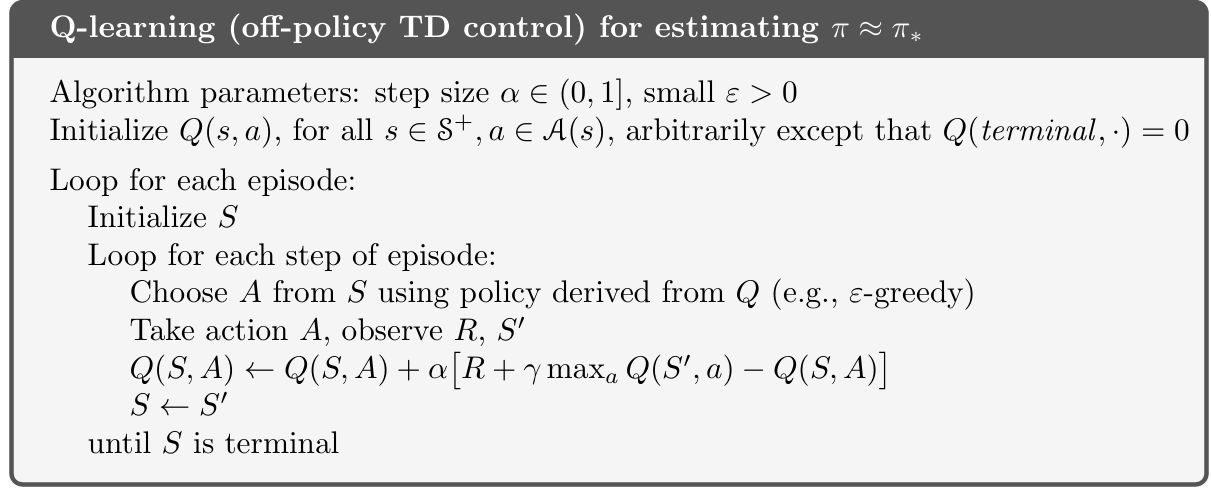

In [6]:
class QLearning:

  def __init__(self, env, learning_rate = 0.1, discount = 0.99, epsilon = 1, epsilon_decay:Optional[float]= None,
               learning_rate_decay:Optional[float] = None, min_epsilon:Optional[float] = None, min_learning_rate:Optional[float] = None):

    self.env = env
    self.state_size = env.observation_space.n
    self.action_space = env.action_space
    self.action_size = env.action_space.n
    self.q_table = np.zeros((self.state_size, self.action_size))

    self.learning_rate = learning_rate
    self.discount = discount
    self.epsilon = epsilon
    self.epsilon_decay = epsilon_decay
    self.learning_rate_decay = learning_rate_decay
    
    self.min_learning_rate = min_learning_rate
    self.min_epsilon = min_epsilon

    self.initial_lr = learning_rate


  def get_action(self, state):
    if np.random.rand() < self.epsilon:
      return env.action_space.sample()
    else:
      return np.argmax(self.q_table[state])

  def train(self, episodes):

    regrets = []
    total_rewards = []
    frames = []

    for episode in trange(episodes):

      state, _ = self.env.reset()
      total_reward = 0

      while True:

        action = self.get_action(state)
        next_state, reward, terminated, truncated, _ = self.env.step(action)

        current_q = self.q_table[state, action]
        next_max_q = np.max(self.q_table[next_state])

        # Write Q-Learning updating rule
        new_q = current_q + self.learning_rate*(reward + self.discount*next_max_q - current_q)
        self.q_table[state , action] = new_q

        total_reward += reward
        state = next_state

        if episode == episodes-1:
          frames.append(self.env.render())

        if terminated or truncated:
          # Calcualte regret
          regret = -13 - total_reward
          regrets.append(regret)
          total_rewards.append(total_reward)
          break

      if (self.epsilon_decay):
        self.epsilon = max(self.min_epsilon, self.epsilon_decay * self.epsilon)

      if (self.learning_rate_decay):
        self.learning_rate = max(self.min_learning_rate, self.initial_lr / (1 + self.learning_rate_decay * episode)) 

    return regrets, total_rewards, frames

#### Learning Rate Decay Method

##### Formula  
The learning rate (`self.learning_rate`) is updated at each episode based on the following equation:

$$
\text{learning\_rate} = \max\left(\text{min\_lr}, \frac{\text{initial\_lr}}{1 + \text{learning\_rate\_decay} \times \text{episode}}\right)
$$

##### Components  
1. **`initial_lr`**:  
   This is the starting learning rate (before decay begins).

2. **`learning_rate_decay`**:  
   A constant that determines how fast the learning rate decreases as episodes progress.

3. **`episode`**:  
   The current episode number, which increases over time.

4. **`min_learning_rate`**:  
   This is the minimum allowable learning rate. The `max` function ensures that the learning rate never falls below this value.

##### Explanation of the Decay Process  
- The **denominator** $1 + \text{learning_rate_decay} \times \text{episode}$ increases as the episode number increases.  
- As the denominator grows larger, the learning rate becomes **smaller**.  
- The learning rate decreases gradually over time, which helps in fine-tuning the learning process.  
- The `max` function ensures that the learning rate does not drop below the specified `min_learning_rate`. This prevents the learning rate from becoming too small to be effective.

##### Key Behavior  
- At **episode = 0**:  
   $$
   \text{learning\_rate} = \frac{\text{initial\_lr}}{1 + 0} = \text{initial\_lr}
   $$  
   (The learning rate starts at its initial value.)

- As **episode increases**:  
   The learning rate decreases because the denominator becomes larger. The higher the `learning_rate_decay`, the faster the decay occurs.

- When the learning rate approaches `min_learning_rate`, the `max` function ensures it does not drop any further.

##### Advantages  
1. **Smooth decay**: The learning rate reduces gradually, enabling the model to converge more stably.  
2. **Prevention of stagnation**: The `min_learning_rate` ensures the learning rate does not become so small that learning halts.  
3. **Flexibility**: By adjusting `learning_rate_decay`, you can control the rate at which the learning rate decreases.

#### Epsilon Decay Method

##### Components of the Decay Mechanism:

1. **Epsilon ($ \epsilon $)**:
   - **Definition**: Represents the probability of taking a random action (exploration) instead of the best-known action (exploitation).
   - A higher $ \epsilon $ encourages more exploration, while a lower $ \epsilon $ makes the agent exploit its knowledge more.

2. **Epsilon Decay**:
   - The process of gradually decreasing $ \epsilon $ over time. This allows the agent to start with more exploration and gradually focus on exploiting its learned knowledge as it becomes more confident in its policy.

3. **Parameters**:
   - **`self.epsilon_decay`**: A factor by which $ \epsilon $ will be multiplied during each update. Typically, this is a value slightly less than 1 (e.g., 0.99), which allows $ \epsilon $ to gradually decrease.
   - **`self.min_epsilon`**: The minimum value that $ \epsilon $ can reach. This is important to ensure that the agent retains a small chance of exploration even later in training to avoid getting stuck in local optima.

##### How It Works:
- **Decay Formula**:
  ```python
  self.epsilon = max(self.min_epsilon, self.epsilon_decay * self.epsilon)
  ```
  - This line updates $ \epsilon $ using the formula:
    - It multiplies the current $ \epsilon $ by `self.epsilon_decay`, which reduces $ \epsilon $.
    - The `max()` function ensures that $ \epsilon $ does not drop below $ \text{self.min_epsilon} $.
  
- **Effect Over Time**:
  - Initially, $ \epsilon $ starts at a relatively high value (e.g., 1.0) to encourage exploration.
  - As the agent learns (over many episodes), $ \epsilon $ will be multiplied by a decay factor, decreasing its value and encouraging more exploitation.
  - Eventually, $ \epsilon $ will stabilize at `self.min_epsilon`, allowing the agent to maintain some exploration but primarily focus on what it has learned.

##### Advantages of Epsilon Decay:
1. **Balanced Learning**: The agent explores sufficiently in the beginning, which is crucial for gathering knowledge about the environment.
2. **Gradual Transition**: It smoothly transitions from exploration to exploitation, allowing for continuous learning while still exploring occasionally.
3. **Avoids Local Optima**: By having a non-zero minimum $ \epsilon $, the agent can escape local optima, as it retains the ability to explore new actions even late in training.

#### Learning rate = $0.1$

In [15]:
total_reward_ql_lr_01, regret_ql_lr_01 = run(env, num_runs, num_episodes, QLearning, 
                                             learning_rate=learning_rate, 
                                             discount=discount, 
                                             epsilon=1.0,
                                             epsilon_decay=epsilon_decay, 
                                             learning_rate_decay=None, 
                                             min_epsilon=min_epsilon, 
                                             min_learning_rate=None)

Run: 1/10


100%|██████████| 200/200 [00:03<00:00, 50.45it/s] 


Run: 2/10


100%|██████████| 200/200 [00:03<00:00, 52.97it/s] 


Run: 3/10


100%|██████████| 200/200 [00:04<00:00, 45.97it/s] 


Run: 4/10


100%|██████████| 200/200 [00:02<00:00, 69.37it/s] 


Run: 5/10


100%|██████████| 200/200 [00:04<00:00, 41.44it/s] 


Run: 6/10


100%|██████████| 200/200 [00:03<00:00, 55.60it/s] 


Run: 7/10


100%|██████████| 200/200 [00:05<00:00, 33.58it/s] 


Run: 8/10


100%|██████████| 200/200 [00:05<00:00, 34.06it/s] 


Run: 9/10


100%|██████████| 200/200 [00:07<00:00, 28.49it/s] 


Run: 10/10


100%|██████████| 200/200 [00:03<00:00, 57.82it/s] 


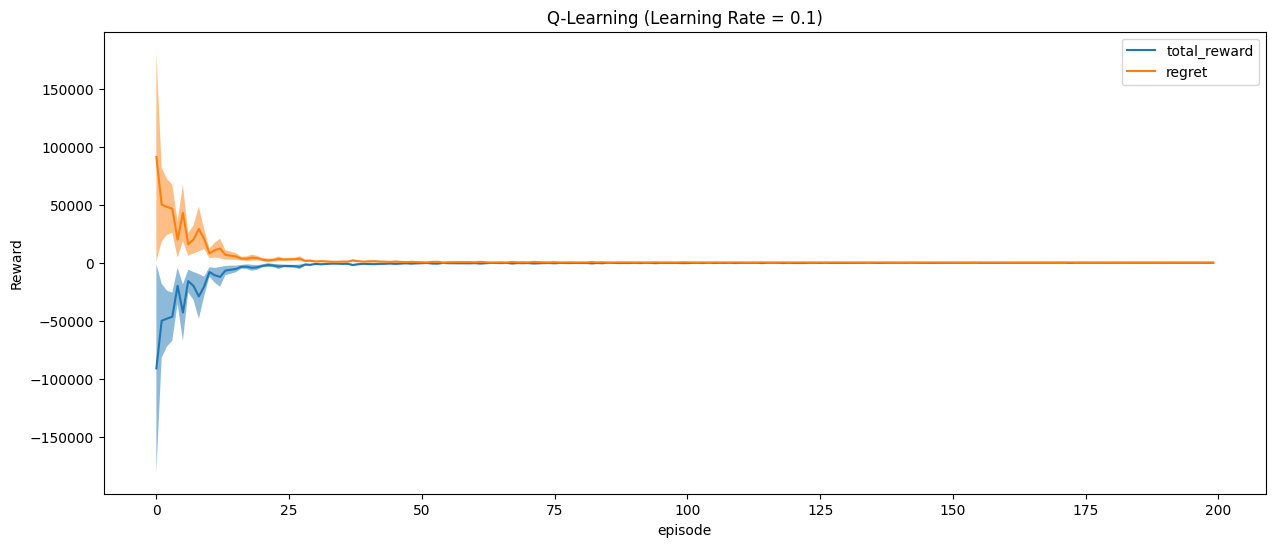

In [16]:
plot_result(total_reward_ql_lr_01, regret_ql_lr_01, num_episodes, num_runs,
                figsize=(15, 6), title="Q-Learning (Learning Rate = 0.1)")

#### Decay Learning Rate

In [12]:
total_reward_ql_lr_dec, regret_ql_lr_dec = run(env, num_runs, num_episodes, QLearning,
                                               learning_rate=1.0, 
                                               discount=discount, 
                                               epsilon=1.0,
                                               epsilon_decay=epsilon_decay, 
                                               learning_rate_decay=learning_rate, 
                                               min_epsilon=min_epsilon, 
                                               min_learning_rate=min_learning_rate)

Run: 1/10


100%|██████████| 200/200 [00:06<00:00, 29.76it/s] 


Run: 2/10


100%|██████████| 200/200 [00:04<00:00, 46.16it/s] 


Run: 3/10


100%|██████████| 200/200 [00:03<00:00, 61.77it/s] 


Run: 4/10


100%|██████████| 200/200 [00:06<00:00, 31.11it/s] 


Run: 5/10


100%|██████████| 200/200 [00:03<00:00, 65.04it/s] 


Run: 6/10


100%|██████████| 200/200 [00:03<00:00, 64.04it/s] 


Run: 7/10


100%|██████████| 200/200 [00:03<00:00, 60.88it/s] 


Run: 8/10


100%|██████████| 200/200 [00:04<00:00, 44.44it/s] 


Run: 9/10


100%|██████████| 200/200 [00:07<00:00, 25.29it/s] 


Run: 10/10


100%|██████████| 200/200 [00:05<00:00, 35.56it/s] 


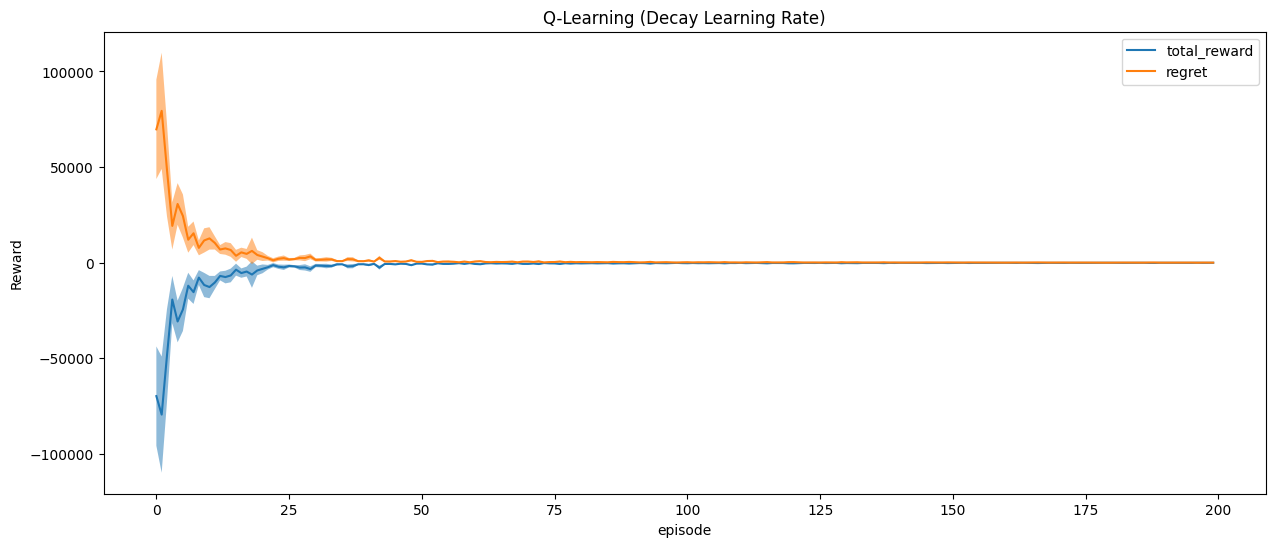

In [13]:
plot_result(total_reward_ql_lr_dec, regret_ql_lr_dec, num_episodes, num_runs,
                figsize=(15, 6), title="Q-Learning (Decay Learning Rate)")

#### Comparison

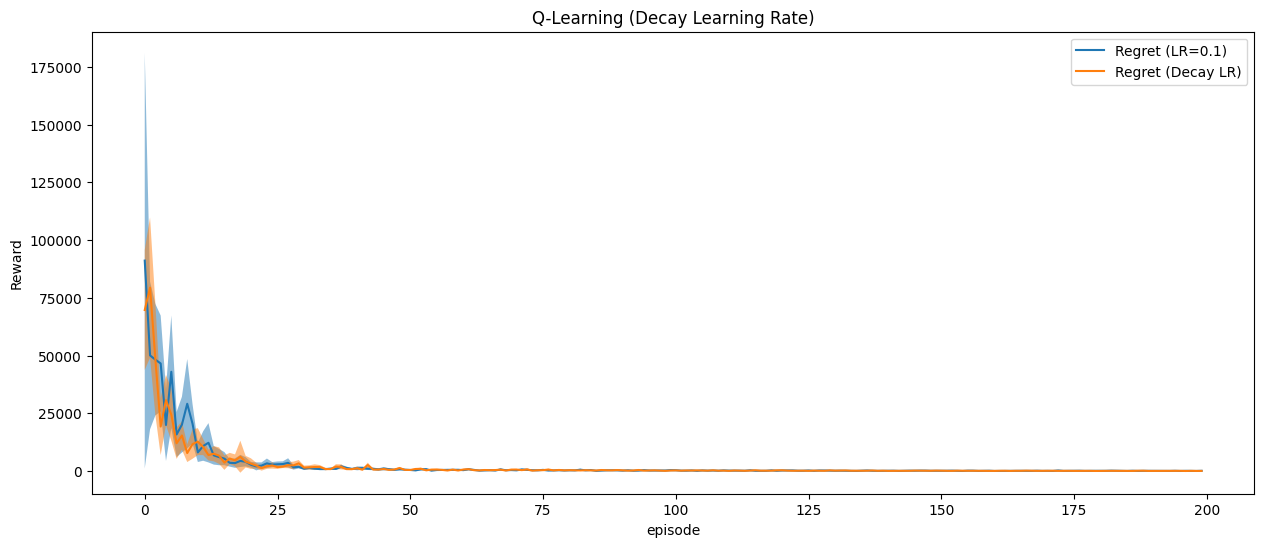

In [18]:
plot_result(regret_ql_lr_01, regret_ql_lr_dec, num_episodes, num_runs,
                figsize=(15, 6), title="Q-Learning (Decay Learning Rate)", fig1_name="Regret (LR=0.1)", fig2_name="Regret (Decay LR)")

Take a closer look at figures:

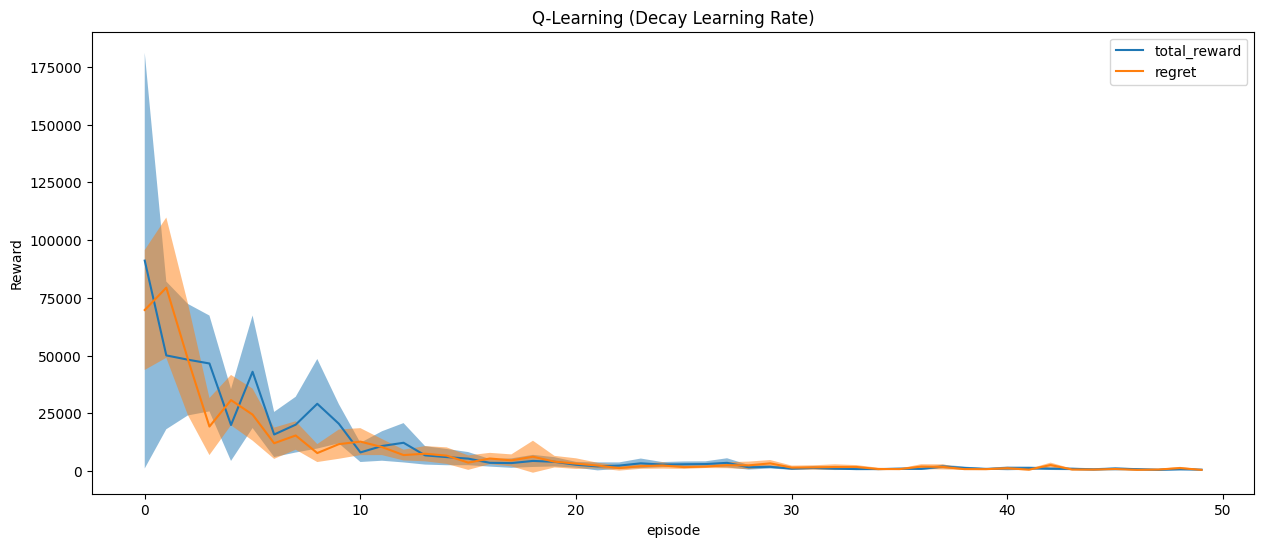

In [20]:
extracted_array1 = [row[:50] for row in regret_ql_lr_01]
extracted_array2 = [row[:50] for row in regret_ql_lr_dec]

plot_result(extracted_array1, extracted_array2, 50, num_runs,
                figsize=(15, 6), title="Q-Learning (Decay Learning Rate)")

Epsilon decay is slightly better in convergence.
But the converged values are the same for both constant learning rate of 0.1 and decay learning reate.

### b

Implement the Sarsa and step-n Backup Tree algorithms for three values ​​of n and compare the results in terms of regret (convergence speed and converged value) and analyze the reason for better performance for a specific value in the results.

#### SARSA

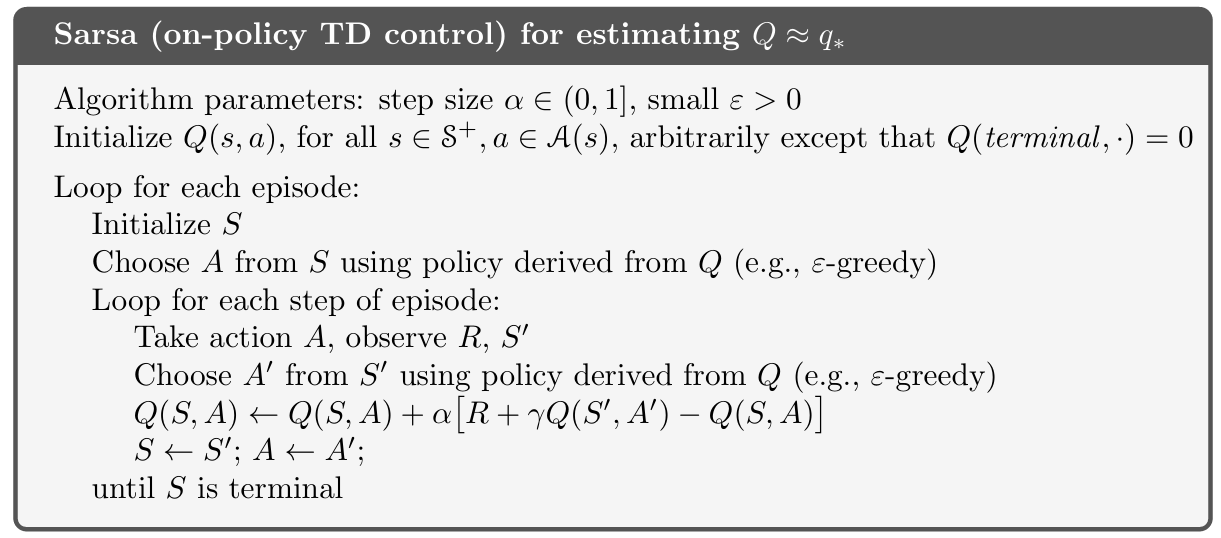

In [22]:
class SARSA:

  def __init__(self, env, learning_rate = 0.1, discount = 0.99, epsilon = 1, epsilon_decay:Optional[float]= None,
               min_epsilon:Optional[float]= None):

    self.env = env
    self.state_size = env.observation_space.n
    self.action_space = env.action_space
    self.action_size = env.action_space.n
    self.q_table = np.zeros((self.state_size, self.action_size))

    self.learning_rate = learning_rate
    self.discount = discount
    self.epsilon = epsilon
    self.epsilon_decay = epsilon_decay
    self.epsilon_min = min_epsilon

  def get_action(self, state):
    if np.random.rand() < self.epsilon:
      return env.action_space.sample()
    else:
      return np.argmax(self.q_table[state])

  def train(self, episodes):

    regrets = []
    total_rewards = []
    frames = []

    for episode in trange(episodes):

      state, _ = self.env.reset()
      action = self.get_action(state)
      total_reward = 0
      # frames_per_episode = []

      while True:

        next_state, reward, terminated, truncated, _  = self.env.step(action)
        next_action = self.get_action(next_state)

        current_q = self.q_table[state, action]
        next_q = self.q_table[next_state, next_action]

        new_q = (1 - self.learning_rate) * current_q + self.learning_rate * (reward + (self.discount * next_q))
        self.q_table[state , action] = new_q


        total_reward += reward
        state = next_state
        action = next_action

        if terminated or truncated:
          # Calcualte regret
          regret = -13 - total_reward
          regrets.append(regret)
          total_rewards.append(total_reward)
          break

        # if episode % 20 == 0:
        #   frames_per_episode.append(self.env.render())

      # if frames_per_episode:
      #   frames.append(frames_per_episode)

      if (self.epsilon_decay) and (self.epsilon > self.epsilon_min):
        self.epsilon = self.epsilon * self.epsilon_decay

    return regrets, total_rewards, frames

In [63]:
total_reward_sarsa, regret_sarsa = run(env, num_runs, num_episodes_2, SARSA,
                                         learning_rate=learning_rate, 
                                         discount=discount, 
                                         epsilon=1.0,
                                         epsilon_decay=epsilon_decay, 
                                         min_epsilon=min_epsilon)

Run: 1/10


100%|██████████| 100/100 [00:15<00:00,  6.27it/s]


Run: 2/10


100%|██████████| 100/100 [00:02<00:00, 34.91it/s]


Run: 3/10


100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


Run: 4/10


100%|██████████| 100/100 [00:04<00:00, 22.35it/s]


Run: 5/10


100%|██████████| 100/100 [00:04<00:00, 21.08it/s]


Run: 6/10


100%|██████████| 100/100 [00:23<00:00,  4.23it/s]


Run: 7/10


100%|██████████| 100/100 [00:06<00:00, 15.15it/s]


Run: 8/10


100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Run: 9/10


100%|██████████| 100/100 [00:12<00:00,  7.79it/s]


Run: 10/10


100%|██████████| 100/100 [00:01<00:00, 70.47it/s]


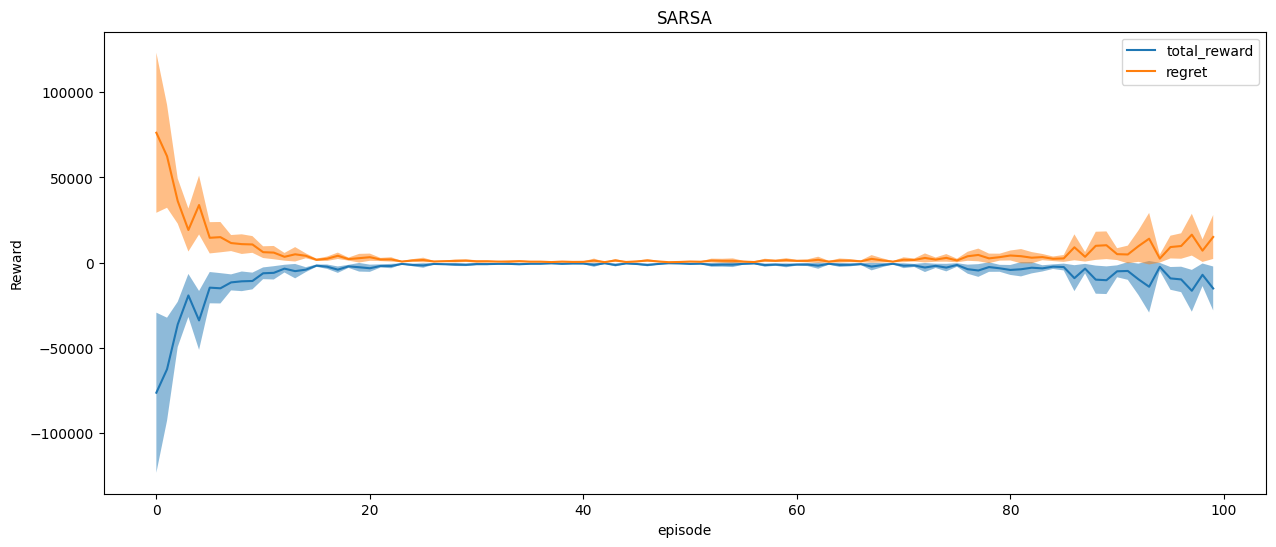

In [64]:
plot_result(total_reward_sarsa, regret_sarsa, num_episodes=num_episodes_2, num_runs=num_runs,
            figsize=(15, 6), title="SARSA")

#### Tree Backup N-Step

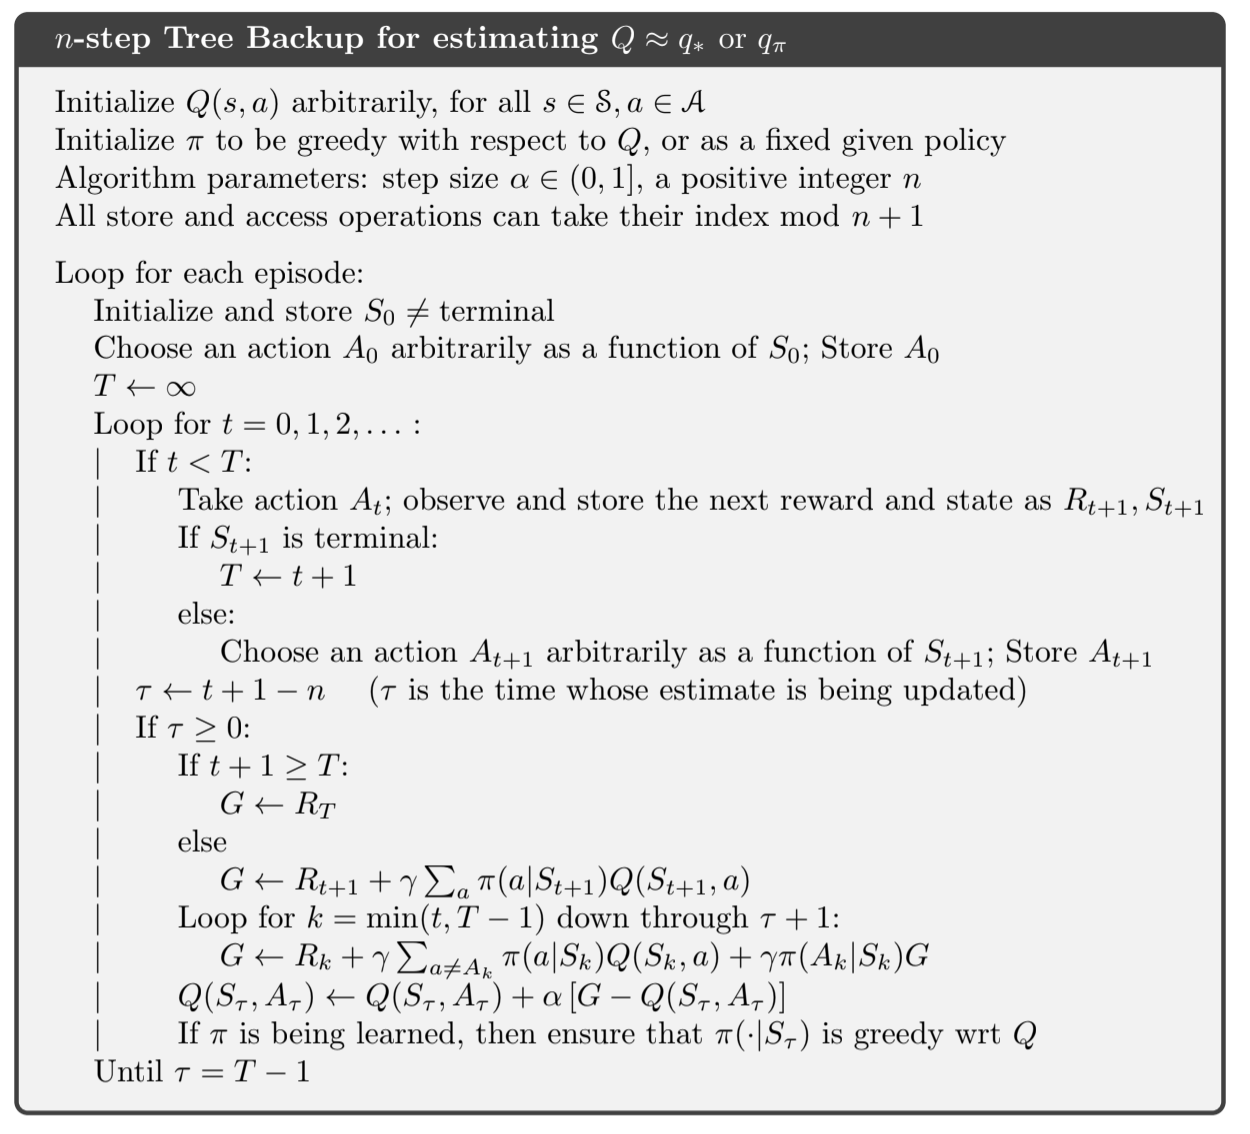

In [25]:
class TreeBackupNStep:

    def __init__(self, env, learning_rate=0.1, discount=0.99, epsilon=1, n=2, 
                 epsilon_decay: Optional[float] = None, min_epsilon: Optional[float] = None):
        self.env = env
        self.state_size = env.observation_space.n
        self.action_space = env.action_space
        self.action_size = env.action_space.n
        self.q_table = np.zeros((self.state_size, self.action_size))
        
        self.learning_rate = learning_rate
        self.discount = discount
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = min_epsilon
        self.n = n
        
        # Experience buffer to hold the last n experiences
        self.buffer = []
        
    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def train(self, episodes):
        regrets = []
        total_rewards = []
        frames = []
        
        for episode in trange(episodes):
            state, _ = self.env.reset()
            action = self.get_action(state)
            total_reward = 0
            # frames_per_episode = []
            
            # t_step = 0
            self.buffer = []

            while True:
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                
                # Store the experience in the buffer
                self.buffer.append((state, action, reward))

                # If the buffer has reached n, we can perform a backup
                if len(self.buffer) == self.n:
                    # Perform backup using the n-step return
                    G = 0
                    # Calculate n-step return
                    for i in range(self.n):
                        G += (self.discount ** i) * self.buffer[-(i + 1)][2]  # Adding the rewards

                    # If the next state is terminal or truncated
                    if not terminated and not truncated:
                        G += (self.discount ** self.n) * np.max(self.q_table[next_state])

                    # New Q-value for the last action in the buffer
                    # Update the Q-value of the oldest state-action pair in the buffer
                    old_state, old_action, _ = self.buffer[0]
                    self.q_table[old_state, old_action] += self.learning_rate * (G - self.q_table[old_state, old_action])


                total_reward += reward
                state = next_state
                action = self.get_action(state)

                if terminated or truncated:
                    # Calculate regret and append to the array
                    regret = -13 - total_reward
                    regrets.append(regret)
                    total_rewards.append(total_reward)
                    break

                # if episode % 20 == 0:
                #     frames_per_episode.append(self.env.render())

                # t_step += 1
                
            # if frames_per_episode:
            #     frames.append(frames_per_episode)

            if (self.epsilon_decay) and (self.epsilon > self.epsilon_min):
                self.epsilon = self.epsilon * self.epsilon_decay
        
        return regrets, total_rewards, frames

##### N = $2$

In [56]:
total_reward_tbu2, regret_tbu2 = run(env, num_runs_2, num_episodes_2, TreeBackupNStep,
                                         learning_rate=learning_rate, 
                                         discount=discount,
                                         epsilon=1.0,
                                         n=2,
                                         epsilon_decay=epsilon_decay,
                                         min_epsilon=min_epsilon)

Run: 1/5


100%|██████████| 100/100 [00:23<00:00,  4.17it/s]


Run: 2/5


100%|██████████| 100/100 [00:18<00:00,  5.40it/s]


Run: 3/5


100%|██████████| 100/100 [00:16<00:00,  6.06it/s]


Run: 4/5


100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


Run: 5/5


100%|██████████| 100/100 [00:19<00:00,  5.05it/s]


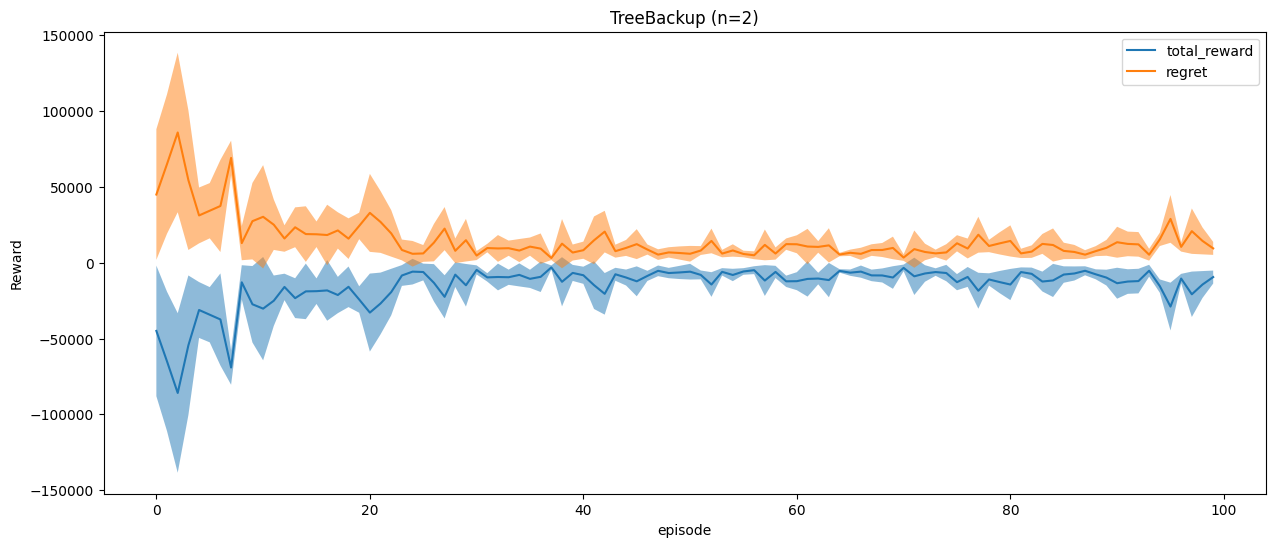

In [57]:
plot_result(total_reward_tbu2, regret_tbu2, num_episodes=num_episodes_2, num_runs=num_runs_2,
            figsize=(15, 6), title="TreeBackup (n=2)")

##### N = $5$

In [54]:
total_reward_tbu5, regret_tbu5 = run(env, num_runs_2, num_episodes_2, TreeBackupNStep,
                                         learning_rate=learning_rate, 
                                         discount=discount,
                                         epsilon=1.0,
                                         n=5,
                                         epsilon_decay=epsilon_decay,
                                         min_epsilon=min_epsilon)

Run: 1/5


100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


Run: 2/5


100%|██████████| 100/100 [00:59<00:00,  1.68it/s]


Run: 3/5


100%|██████████| 100/100 [01:03<00:00,  1.58it/s]


Run: 4/5


100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


Run: 5/5


100%|██████████| 100/100 [00:36<00:00,  2.72it/s]


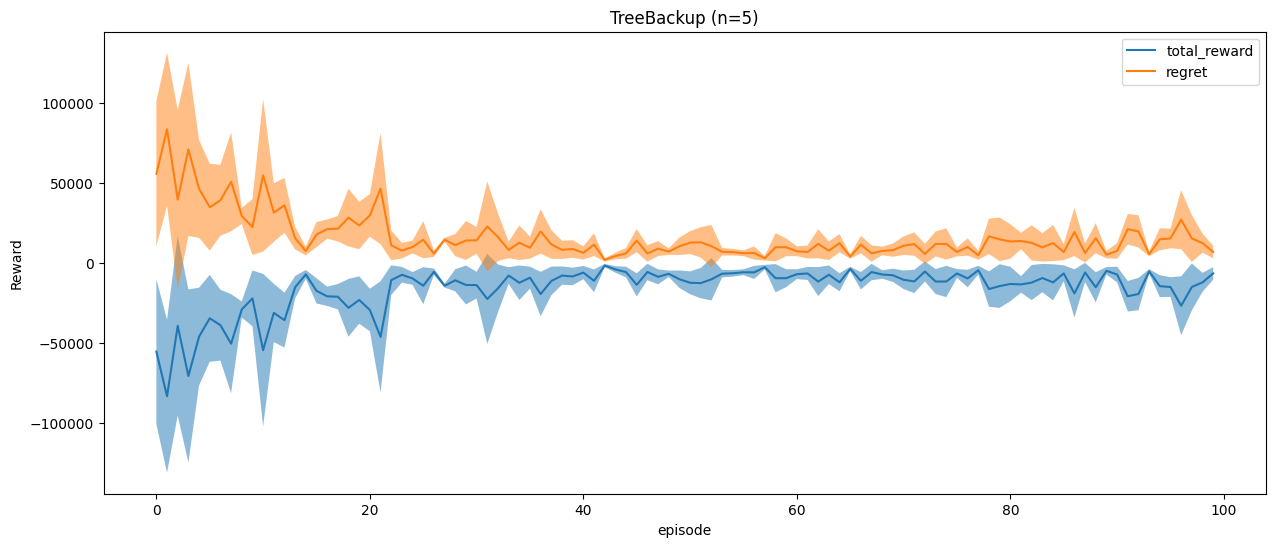

In [55]:
plot_result(total_reward_tbu5, regret_tbu5, num_episodes=num_episodes_2, num_runs=num_runs_2,
            figsize=(15, 6), title="TreeBackup (n=5)")

##### N = $10$

In [52]:
total_reward_tbu10, regret_tbu10 = run(env, num_runs_2, num_episodes_2, TreeBackupNStep,
                                         learning_rate=learning_rate, 
                                         discount=discount,
                                         epsilon=1.0,
                                         n=10,
                                         epsilon_decay=epsilon_decay,
                                         min_epsilon=min_epsilon)

Run: 1/5


100%|██████████| 100/100 [00:33<00:00,  3.00it/s]


Run: 2/5


100%|██████████| 100/100 [00:43<00:00,  2.31it/s]


Run: 3/5


100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


Run: 4/5


100%|██████████| 100/100 [00:39<00:00,  2.51it/s]


Run: 5/5


100%|██████████| 100/100 [00:42<00:00,  2.36it/s]


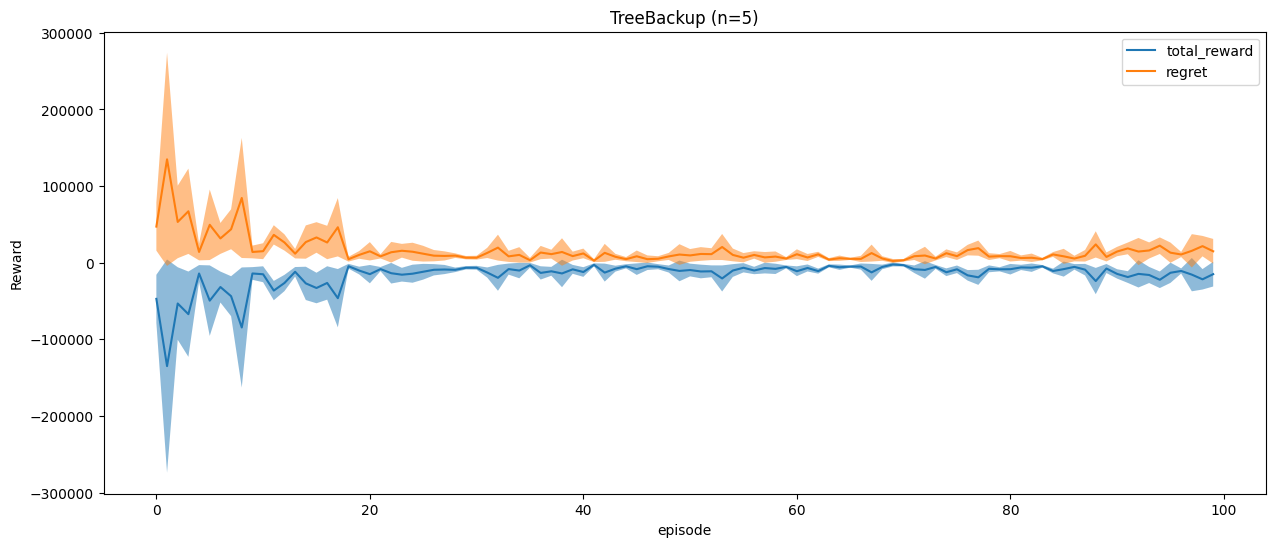

In [53]:
plot_result(total_reward_tbu10, regret_tbu10, num_episodes=num_episodes_2, num_runs=num_runs_2,
            figsize=(15, 6), title="TreeBackup (n=5)")

#### Comparison

##### Tree Backup N-Steps

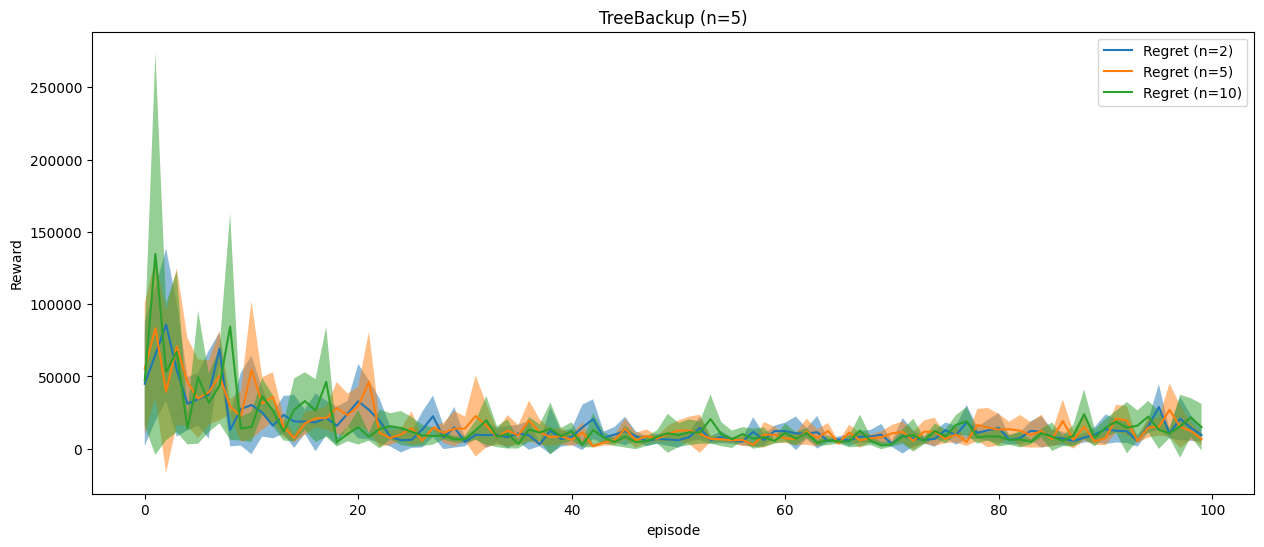

In [62]:
plot_result3(regret_tbu2, regret_tbu5, regret_tbu10, num_episodes=num_episodes_2, num_runs=5,
            figsize=(15, 6), title="TreeBackup (n=5)", fig1_name="Regret (n=2)", fig2_name="Regret (n=5)", fig3_name="Regret (n=10)")

As you can see, tree backup with n=5 seems a higher stablity (lower variance) and a better convergence value. On the other hand, n=10 shows the highest variance and lowest stability among these plots.

##### Tree Backup N-Step (n=2) and SARSA

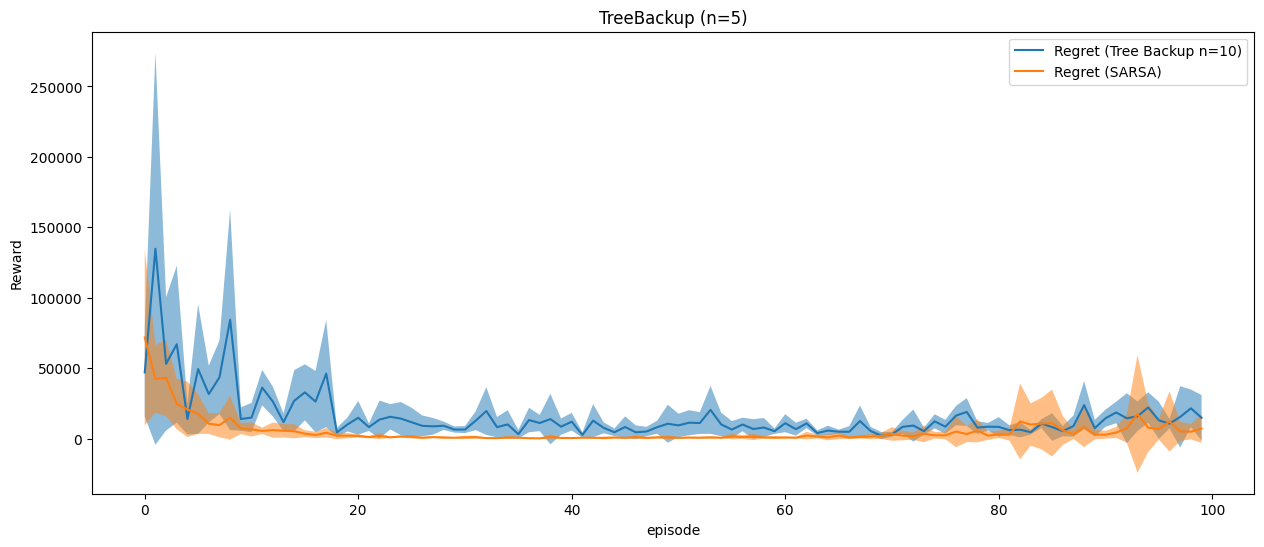

In [60]:
plot_result(regret_tbu10, regret_sarsa, num_episodes=num_episodes_2, num_runs=num_runs_2,
            figsize=(15, 6), title="TreeBackup (n=5)", fig1_name="Regret (Tree Backup n=10)", fig2_name="Regret (SARSA)")

As you can see, SARSA is better in terms of both convergence speed and final value.

### c

Solve the problem using the MC Policy-Off method and perform the requested steps once for the decreasing epsilon and also for epsilon 0.1 and compare the results obtained in terms of regret (convergence speed and converged value).

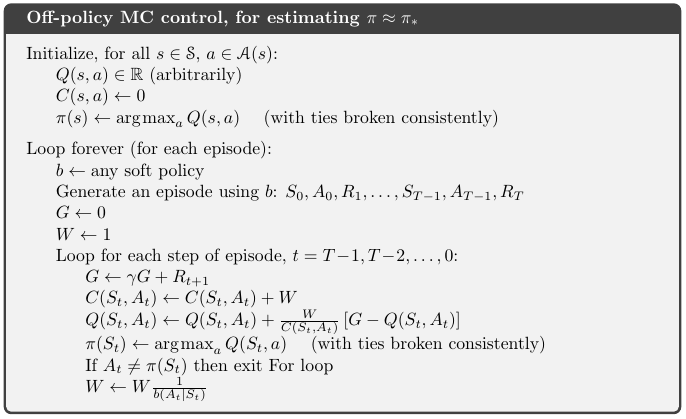

In [46]:
class MonteCarloOffPolicy:

    def __init__(self, env, discount=0.99, epsilon=1.0, epsilon_decay=None,
                 min_epsilon=None, max_steps_per_episode=None):

        self.env = env
        self.state_size = env.observation_space.n
        self.action_size = env.action_space.n
        self.q_table = np.zeros((self.state_size, self.action_size))

        self.returns_sum = np.zeros((self.state_size, self.action_size))
        self.returns_count = np.zeros((self.state_size, self.action_size))

        self.discount = discount
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = min_epsilon

        self.max_steps_per_episode = max_steps_per_episode

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def train(self, episodes):
        total_rewards = []
        regrets = []

        for i in trange(episodes):
            state, _ = self.env.reset()
            episode = []

            t_step = 0

            while t_step < self.max_steps_per_episode:
                t_step += 1

                action = self.get_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                episode.append((state, action, reward))
                state = next_state
                if terminated or truncated:
                    break
                elif i == self.max_steps_per_episode:
                    reward = -100

            G = 0
            visited_state_action_pairs = set()
            for state, action, reward in reversed(episode):
                G = self.discount * G + reward

                best_action = np.argmax(self.q_table[state])
                
                target_policy_prob = 1.0 if action == best_action else 0.0

                if action == best_action:
                    behavior_policy_prob = (self.epsilon / self.action_size) + (1 - self.epsilon)
                else:
                    behavior_policy_prob = self.epsilon / self.action_size

                rho = target_policy_prob / behavior_policy_prob

                if (state, action) not in visited_state_action_pairs:
                    self.returns_sum[state, action] += G * rho
                    self.returns_count[state, action] += 1 * rho
                    self.q_table[state, action] = self.returns_sum[state, action] / self.returns_count[state, action]
                    visited_state_action_pairs.add((state, action))

            total_rewards.append(sum(x[2] for x in episode))
            regrets.append(-13 - sum(x[2] for x in episode))

            if (self.epsilon_decay) and (self.epsilon > self.epsilon_min):
                self.epsilon *= self.epsilon_decay

        return regrets, total_rewards, None

#### Epsilon = $0.1$

In [47]:
total_reward_mcoff, regret_mcoff = run(env, num_runs_2, num_episodes_2, MonteCarloOffPolicy,
                                         discount=discount,
                                         epsilon=0.1,
                                         epsilon_decay=None,
                                         min_epsilon=min_epsilon,
                                         max_steps_per_episode=10000)

Run: 1/5


100%|██████████| 100/100 [00:50<00:00,  1.97it/s]


Run: 2/5


100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


Run: 3/5


100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


Run: 4/5


100%|██████████| 100/100 [01:05<00:00,  1.52it/s]


Run: 5/5


100%|██████████| 100/100 [01:08<00:00,  1.45it/s]


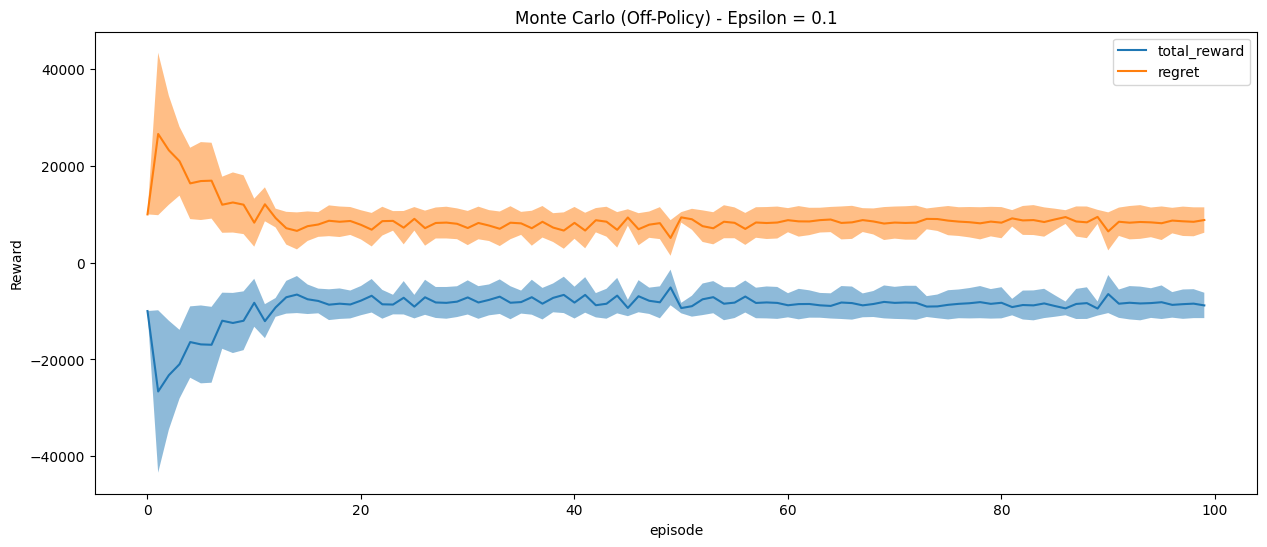

In [49]:
plot_result(total_reward_mcoff, regret_mcoff, num_episodes=num_episodes_2, num_runs=num_runs_2,
            figsize=(15, 6), title="Monte Carlo (Off-Policy) - Epsilon = 0.1")

It doesn't converge.

#### Decay Epsilon

In [50]:
total_reward_mcoff_dec, regret_mcoff_dec = run(env, num_runs_2, num_episodes_2, MonteCarloOffPolicy,
                                         discount=discount,
                                         epsilon=1.0,
                                         epsilon_decay=epsilon_decay,
                                         min_epsilon=min_epsilon,
                                         max_steps_per_episode=10000)

Run: 1/5


100%|██████████| 100/100 [00:10<00:00,  9.68it/s]


Run: 2/5


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


Run: 3/5


100%|██████████| 100/100 [00:06<00:00, 15.51it/s]


Run: 4/5


100%|██████████| 100/100 [00:05<00:00, 19.75it/s]


Run: 5/5


100%|██████████| 100/100 [00:09<00:00, 10.51it/s]


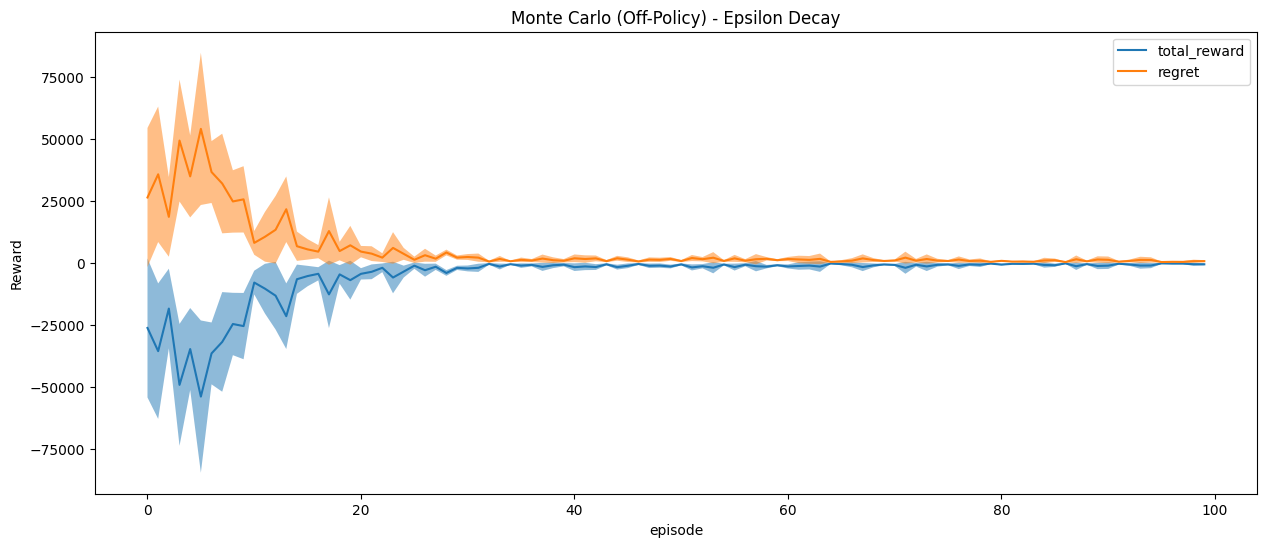

In [51]:
plot_result(total_reward_mcoff_dec, regret_mcoff_dec, num_episodes=num_episodes_2, num_runs=num_runs_2,
            figsize=(15, 6), title="Monte Carlo (Off-Policy) - Epsilon Decay")

However, it does.